# Description 

Dataset was provided by Vesta Corporation in colaboration with IEEE Computational Intelligence Society (IEEE-CIS) to improve IEEE-CIS's fraud prevention system.

# Variables
 - Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

## Continuous Variables
- TransactionDT: timedelta from a given reference datetime, in secs (not actual timestamp)
    - reference datetime is starting from Sunday 00:00:00 
    - is in seconds
- TransactionAMT: txn payment in USD
- dist: distance
- addr: address
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked
- D1-D15: timedelta, such as days between previous transaction, etc.

## Categorical Features - Transaction (txn)
- ProductCD: product code, the product for each transaction
- card1-card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr1, addr2
- P_emaildomain: purchaser email domain
- R_emaildomain: recipient email domain
- M1-M9: match, such as names on card and address, etc

## Categorical Featues - identity (ID)
- DeviceType
- DeviceInfo
- id_12 - id_38

# Project Objective 
Is to predict the probability that an online transaction is fradulent or in other words predict the probability for *isFraud* variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
sample = pd.read_csv('sample_submission.csv')
df_test_id = pd.read_csv('test_identity.csv')
df_test_txn = pd.read_csv('test_transaction.csv')
df_train_id = pd.read_csv('train_identity.csv')
df_train_txn = pd.read_csv('train_transaction.csv')

# Inspect data

df_test_id 
- 141907 rows x 41 columns
- has NaNs

df_test_txn 
- 506691 rows x 393 columns

df_train_id
- 144233 rows x 41 columns 
- has NaNs

df_train_txn
- 506691 rows x 394 columns

In [3]:
df_test_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

array([[<AxesSubplot:title={'center':'TransactionID'}>,
        <AxesSubplot:title={'center':'id-01'}>,
        <AxesSubplot:title={'center':'id-02'}>,
        <AxesSubplot:title={'center':'id-03'}>,
        <AxesSubplot:title={'center':'id-04'}>],
       [<AxesSubplot:title={'center':'id-05'}>,
        <AxesSubplot:title={'center':'id-06'}>,
        <AxesSubplot:title={'center':'id-07'}>,
        <AxesSubplot:title={'center':'id-08'}>,
        <AxesSubplot:title={'center':'id-09'}>],
       [<AxesSubplot:title={'center':'id-10'}>,
        <AxesSubplot:title={'center':'id-11'}>,
        <AxesSubplot:title={'center':'id-13'}>,
        <AxesSubplot:title={'center':'id-14'}>,
        <AxesSubplot:title={'center':'id-17'}>],
       [<AxesSubplot:title={'center':'id-18'}>,
        <AxesSubplot:title={'center':'id-19'}>,
        <AxesSubplot:title={'center':'id-20'}>,
        <AxesSubplot:title={'center':'id-21'}>,
        <AxesSubplot:title={'center':'id-22'}>],
       [<AxesSubplot:title={

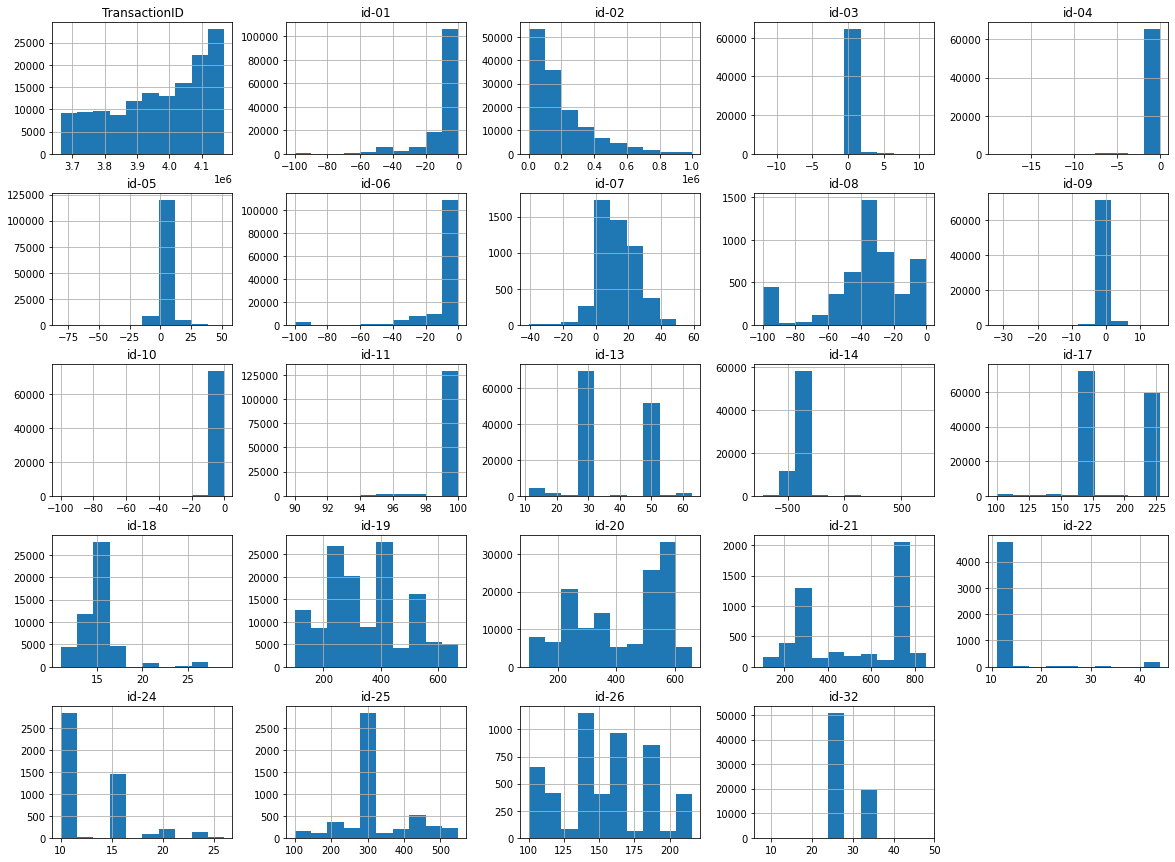

In [4]:
df_test_id.hist(figsize = (20,15))

In [5]:
df_test_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


In [6]:
df_train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

array([[<AxesSubplot:title={'center':'TransactionID'}>,
        <AxesSubplot:title={'center':'id_01'}>,
        <AxesSubplot:title={'center':'id_02'}>,
        <AxesSubplot:title={'center':'id_03'}>,
        <AxesSubplot:title={'center':'id_04'}>],
       [<AxesSubplot:title={'center':'id_05'}>,
        <AxesSubplot:title={'center':'id_06'}>,
        <AxesSubplot:title={'center':'id_07'}>,
        <AxesSubplot:title={'center':'id_08'}>,
        <AxesSubplot:title={'center':'id_09'}>],
       [<AxesSubplot:title={'center':'id_10'}>,
        <AxesSubplot:title={'center':'id_11'}>,
        <AxesSubplot:title={'center':'id_13'}>,
        <AxesSubplot:title={'center':'id_14'}>,
        <AxesSubplot:title={'center':'id_17'}>],
       [<AxesSubplot:title={'center':'id_18'}>,
        <AxesSubplot:title={'center':'id_19'}>,
        <AxesSubplot:title={'center':'id_20'}>,
        <AxesSubplot:title={'center':'id_21'}>,
        <AxesSubplot:title={'center':'id_22'}>],
       [<AxesSubplot:title={

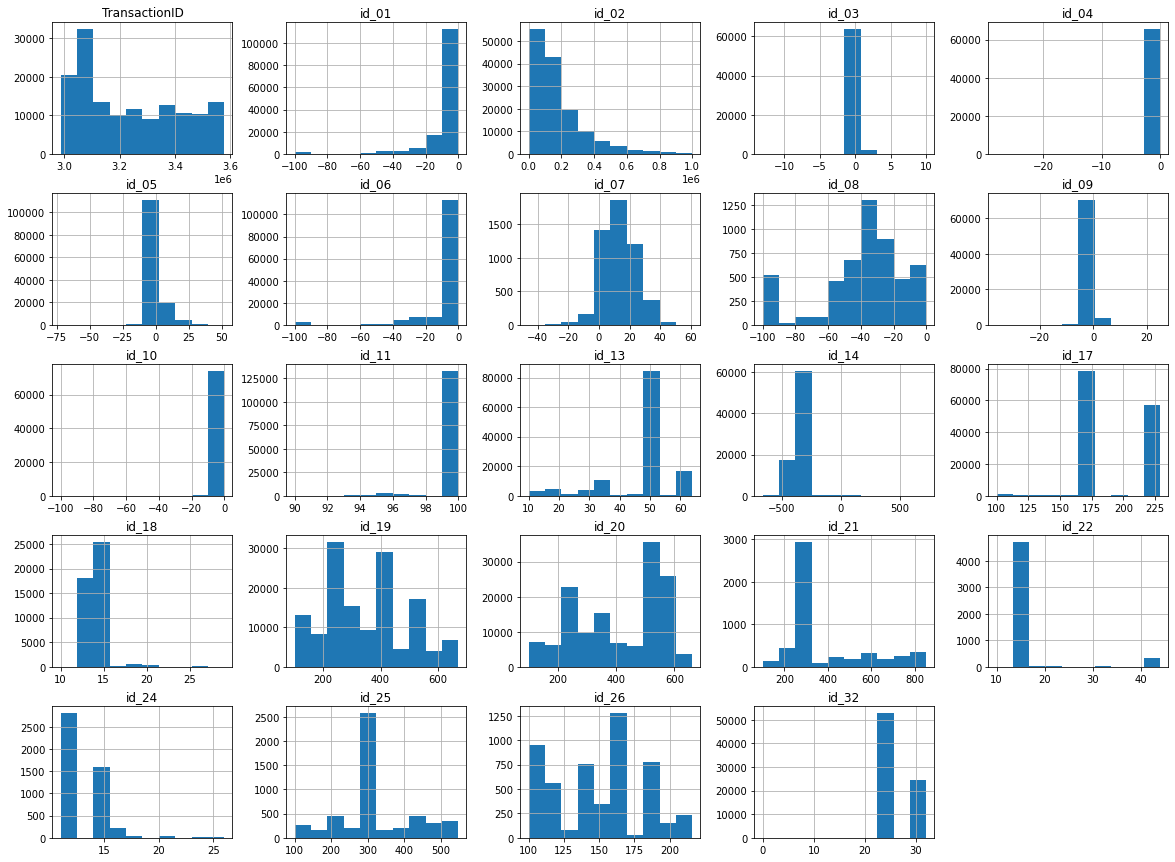

In [7]:
df_train_id.hist(figsize = (20,15))

In [8]:
df_train_txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [9]:
df_test_txn.columns

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
       'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=393)

# Create test and train dataframes

In [10]:
# combine test dataframes
# returns all records from test_id (left) and the matchin records from test_txn
df_test = df_test_id.merge(
    df_test_txn,
    on = ['TransactionID'],
    how = 'left'                      
)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141907 entries, 0 to 141906
Columns: 433 entries, TransactionID to V339
dtypes: float64(399), int64(3), object(31)
memory usage: 469.9+ MB


In [12]:
df_test.columns

Index(['TransactionID', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06',
       'id-07', 'id-08', 'id-09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=433)

In [13]:
# combine train dataframes
# returns all records from train_id (left) and the matchin records from train_txn
df_train = df_train_id.merge(
    df_train_txn,
    on = ['TransactionID'],
    how = 'left'
)

In [14]:
df_train.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=434)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Columns: 434 entries, TransactionID to V339
dtypes: float64(399), int64(4), object(31)
memory usage: 478.7+ MB


In [16]:
# fix the id- to id_ in df_test to match with df_train id_

# find the id columns
id_cols = [col for col in df_test.columns if col[0]+col[1] == 'id']

# dict comprehension where key are old id label and value are new id label
# takes the id numerical values and adds it to 'id_'
rename_cols = {i:'id_'+str(i[-2]+i[-1]) for i in id_cols}

# replace id names in df_test
df_test.rename(
    columns = rename_cols,
    inplace = True
)

In [17]:
df_test.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=433)

# Dealing With Null Values
 1. remove columns if they are over 90% null values
 2. for columns that are objects fillna with the most common value w/ mode()
 3. for numerical columns fillna with the mean()

In [18]:
#1
null_cols = [
    col for col in df_train.columns \
    
    # num of null values in column / total number of rows in df (144233)
    if df_train[col].isnull().sum() / df_train.shape[0] > 0.9
]

In [19]:
# drop the columns with over 90% null values
df_train.drop(
    null_cols,
    axis = 1,
    inplace = True
)

In [21]:
#2
for col in df_train.columns:
    if df_train[col].dtypes == 'object':
        df_train[col].fillna(
            df_train[col].mode()[0],
            inplace = True
        )

In [25]:
# lower accuracy of float64 values to float32 to improve memory usage

float64_col = df_train.select_dtypes(include = 'float64').columns    # find columns that are float64

df_train[float64_col] = df_train[float64_col].astype('float32')    # change to float32

In [27]:
#3
for i in df_train.columns:
    if df_train[i].dtypes == 'int64' or df_train[i].dtypes == 'float32':
        df_train[i].fillna(
            df_train[i].mean(),
            inplace = True
        )

# Adding Features

In [55]:
# % 86400 gives remainder of the number of seconds after Sunday 00:00:00
# % 7 converts the remainder value into its corresponding weekday 
# weekday range from [0, 6]

df_train['txn_weekday'] = df_train['TransactionDT'] % 86400 % 7

In [57]:
# returns the hr of the day txn was made
df_train['txn_hr'] = df_train['TransactionDT'] / 3600 % 24

In [64]:
# returns device_name['0'] and device_model['1']
DeviceInfo = df_train['DeviceInfo'].str.split('/', expand=True)

df_train['device_name'] = DeviceInfo[0]
df_train['device_version'] = DeviceInfo[1]

In [88]:
# split the strings in id_30 that have a space between strings
device_OS = df_train['id_30'].str.split(' ', expand = True)

df_train['OS'] = device_OS[0]          # operating system
df_train['OS_version'] = device_OS[1]  # operating system version

## Getting Browser Info
- if browser is using mobile it is exclusively using the safari app and the version of the safari is in the column '2'

In [137]:
browser = df_train['id_31'].str.split(' ', expand = True)
browser

,0,1,2,3
0,samsung,browser,6.2,None
1,mobile,safari,11.0,None
2,chrome,62.0,None,None
3,chrome,62.0,None,None
4,chrome,62.0,None,None
...,...,...,...,...
144228,chrome,66.0,for,android
144229,chrome,55.0,for,android
144230,chrome,65.0,for,android
144231,chrome,66.0,None,None
